## Read me
#### How to use
1. Put all data which read from Data Collector App into file "data". **Totally 8 files: battery.csv, cpuFreq.csv, cpuTime.csv, gpu.csv, memory.csv, net.csv, temperature.csv, time.csv**. Data generation frequency: 1/s.
2. Put all heat map photos which read from front side IR camera into file "FLIROne_front". Photo generation frequency: 1/5s.
3. Put all heat map photos which read from back side IR camera into file "FLIROne_back". Photo generation frequency: 1/5s.
4. "Cell" -> "Run All"

***Data preprocessing takes time, especially in the case of abstracting specific data from numpy array of heat map. It take 0.5s at least to deal with one heat map. Just be patient :) I will try to optimise it later... By Xiaoyang***

#### Code structure
1. Data preprocessing (Done)
2. ML Model. I set a Linear Regression here as a "Hello World" model, feel free to replace whatever model you like : )

###### Author: Xiaoyang Zhang      @@@      Email: xzhan211@binghamton.edu

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Time csv

In [2]:
Time = pd.read_csv('data/time.csv', sep='\t', names=["time"])
Time.drop(Time.index[len(Time)-1], inplace = True)
Time['time'] = Time['time'].astype(int)

In [3]:
Time.head()

,time
0,151835
1,151836
2,151837
3,151839
4,151840


In [4]:
Time.tail()

,time
1460,154601
1461,154602
1462,154603
1463,154604
1464,154605


### Battery csv

In [5]:
Battery = pd.read_csv('data/battery.csv', sep=',', names=["bat_voltage", "bat_temp", "bat_capacity", "bat_current"])
Battery.drop(Battery.index[len(Battery)-1], inplace = True)
for x in list(Battery.columns.values):
    Battery[x] = Battery[x].astype(float)

In [6]:
Battery['bat_power'] = (Battery.bat_voltage / 1000) * (Battery.bat_current / 1000) * 1000

In [7]:
Battery.head()

,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power
0,4383.0,34.0,93.0,-937.0,-4106.871
1,4383.0,34.0,93.0,-933.0,-4089.339
2,4383.0,34.0,93.0,-945.0,-4141.935
3,4383.0,34.0,93.0,-950.0,-4163.850
4,4383.0,34.0,93.0,-946.0,-4146.318


In [8]:
Battery.tail()

,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power
1460,4155.0,35.0,85.0,364.0,1512.420
1461,4175.0,36.0,85.0,171.0,713.925
1462,4176.0,35.0,85.0,427.0,1783.152
1463,4161.0,35.0,85.0,368.0,1531.248
1464,4135.0,35.0,85.0,817.0,3378.295


### GPU csv

In [9]:
GPU = pd.read_csv('data/gpu.csv', sep=',', names=["gpu_usage", "gpu_temp", "gpu_freq"])
GPU.drop(GPU.index[len(GPU)-1], inplace = True)
for x in list(GPU.columns.values):
    GPU[x] = GPU[x].astype(float)

In [10]:
GPU.head()

,gpu_usage,gpu_temp,gpu_freq
0,14.0,38.6,257000000.0
1,3.0,38.2,257000000.0
2,0.0,38.2,257000000.0
3,5.0,39.0,257000000.0
4,13.0,38.6,257000000.0


In [11]:
GPU.tail()

,gpu_usage,gpu_temp,gpu_freq
1460,36.0,44.0,257000000.0
1461,0.0,42.8,257000000.0
1462,21.0,42.8,257000000.0
1463,21.0,42.4,257000000.0
1464,20.0,42.0,257000000.0


### Net csv (KB/s)

In [12]:
Net = pd.read_csv('data/net.csv', sep=',', names=["tx", "rx"])
Net.drop(Net.index[len(Net)-1], inplace = True)
for x in list(Net.columns.values):
    Net[x] = Net[x].astype(float)

In [13]:
Net.head()

,tx,rx
0,41200.650,5599313.500
1,0.000,0.000
2,0.078,0.072
3,0.000,0.000
4,1.717,0.455


In [14]:
Net.tail()

,tx,rx
1460,8.422,9.573
1461,0.000,0.000
1462,0.000,0.000
1463,0.164,0.136
1464,0.042,0.028


### CPU frequency csv (kHz)

In [15]:
size = len(pd.read_csv('data/cpuFreq.csv').columns);

In [16]:
titles = []
for i in range(0, size):
    titles.append('f_cpu' + str(i))

CPUFreq = pd.read_csv('data/cpuFreq.csv', sep=',', names=titles)
CPUFreq.drop(CPUFreq.index[len(CPUFreq)-1], inplace = True)
for x in list(CPUFreq.columns.values):
    CPUFreq[x] = CPUFreq[x].astype(float)

In [17]:
CPUFreq.head()

,f_cpu0,f_cpu1,f_cpu2,f_cpu3,f_cpu4,f_cpu5,f_cpu6,f_cpu7
0,1113600.0,1113600.0,1113600.0,1113600.0,1401600.0,1401600.0,1401600.0,1286400.0
1,576000.0,576000.0,576000.0,576000.0,1804800.0,1804800.0,1804800.0,825600.0
2,576000.0,576000.0,576000.0,576000.0,710400.0,710400.0,710400.0,825600.0
3,1113600.0,1113600.0,1113600.0,1113600.0,1708800.0,1708800.0,1708800.0,1286400.0
4,1785600.0,1785600.0,1785600.0,1785600.0,1171200.0,1171200.0,1171200.0,825600.0


In [18]:
CPUFreq.tail()

,f_cpu0,f_cpu1,f_cpu2,f_cpu3,f_cpu4,f_cpu5,f_cpu6,f_cpu7
1460,576000.0,576000.0,576000.0,576000.0,940800.0,940800.0,940800.0,825600.0
1461,1305600.0,1305600.0,1305600.0,1305600.0,710400.0,710400.0,710400.0,825600.0
1462,1785600.0,1785600.0,1785600.0,1785600.0,2419200.0,2419200.0,2419200.0,2841600.0
1463,576000.0,576000.0,576000.0,576000.0,1286400.0,1286400.0,1286400.0,825600.0
1464,576000.0,576000.0,576000.0,576000.0,710400.0,710400.0,710400.0,1286400.0


### CPU time csv

In [19]:
colSize = len(pd.read_csv('data/cpuTime.csv').columns);
titles = []
for i in range(0, colSize):
    if i == 0:
        titles.append('cpu')
    else:
        titles.append('cpu' + str(i-1))
#titles

In [20]:
CPUTime = pd.read_csv('data/cpuTime.csv', sep=',', names=titles)
CPUTime.drop(CPUTime.index[len(CPUTime)-1], inplace = True)

In [21]:
CPUTime.head()

,cpu,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
0,1373769 122243 848887 14777305 13890 128160 5...,158193 28820 162588 1752031 2348 35298 10889 ...,157946 29492 161407 1753136 2310 23507 21871 ...,138456 14947 159208 1802512 2341 22400 11047 ...,123629 14332 163871 1802579 2200 32343 8102 0...,196191 7655 51906 1919252 673 3484 1374 0 0 0,200030 10773 59158 1904742 703 3788 1372 0 0 0,198748 11252 58607 1906475 780 3742 1358 0 0 0,200573 4969 32138 1936574 2530 3594 1491 0 0 0
1,1373807 122244 848918 14778118 13890 128166 5...,158200 28820 162596 1752122 2348 35302 10890 ...,157954 29492 161412 1753231 2310 23508 21871 ...,138462 14948 159216 1802606 2341 22400 11047 ...,123636 14332 163878 1802673 2200 32344 8102 0...,196193 7655 51906 1919361 673 3484 1374 0 0 0,200034 10773 59160 1904850 703 3788 1372 0 0 0,198750 11252 58609 1906584 780 3742 1358 0 0 0,200573 4969 32138 1936687 2530 3594 1491 0 0 0
2,1373832 122246 848940 14779038 13890 128169 5...,158203 28820 162600 1752233 2348 35303 10891 ...,157957 29493 161416 1753342 2310 23508 21871 ...,138467 14948 159223 1802716 2341 22401 11048 ...,123641 14333 163881 1802786 2200 32345 8102 0...,196194 7655 51906 1919482 673 3484 1374 0 0 0,200035 10773 59160 1904971 703 3788 1372 0 0 0,198759 11252 58612 1906696 780 3742 1358 0 0 0,200573 4969 32139 1936809 2530 3594 1492 0 0 0
3,1373894 122272 849004 14779828 13890 128175 5...,158210 28827 162614 1752319 2348 35306 10891 ...,157964 29511 161440 1753407 2310 23510 21872 ...,138476 14948 159232 1802815 2341 22401 11048 ...,123652 14333 163887 1802884 2200 32345 8103 0...,196199 7655 51909 1919594 673 3484 1374 0 0 0,200042 10773 59165 1905079 703 3788 1372 0 0 0,198774 11252 58616 1906798 780 3742 1359 0 0 0,200575 4969 32139 1936928 2530 3594 1492 0 0 0
4,1373958 122290 849070 14780543 13890 128182 5...,158223 28829 162628 1752395 2349 35309 10892 ...,157972 29512 161455 1753489 2310 23511 21872 ...,138485 14956 159240 1802897 2341 22402 11048 ...,123660 14339 163901 1802961 2200 32347 8103 0...,196206 7656 51912 1919692 673 3485 1374 0 0 0,200051 10773 59170 1905175 703 3788 1372 0 0 0,198780 11253 58619 1906898 780 3742 1359 0 0 0,200577 4969 32141 1937034 2530 3595 1492 0 0 0


In [22]:
CPUTime.tail()

,cpu,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
1460,1541147 133379 985400 15709002 14109 154053 6...,183422 31587 187067 1846113 2367 43201 12651 ...,183885 32126 187302 1852104 2336 25947 22710 ...,163572 16888 183653 1895591 2352 33946 11865 ...,148604 16221 190139 1902706 2209 34408 9667 0...,215778 8221 61155 2051948 715 3973 1545 0 0 0,220411 11320 70867 2033737 740 4427 1551 0 0 0,219134 11781 69895 2035976 814 4371 1538 0 0 0,206338 5231 35318 2090823 2572 3777 1545 0 0 0
1461,1541164 133384 985419 15709845 14109 154055 6...,183428 31588 187071 1846213 2367 43202 12651 ...,183886 32129 187306 1852205 2336 25948 22710 ...,163576 16888 183657 1895693 2352 33946 11865 ...,148606 16222 190143 1902808 2209 34408 9667 0...,215781 8221 61157 2052056 715 3973 1545 0 0 0,220412 11320 70867 2033846 740 4427 1551 0 0 0,219134 11782 69896 2036085 814 4371 1538 0 0 0,206338 5231 35318 2090934 2572 3777 1545 0 0 0
1462,1541212 133392 985478 15710599 14109 154062 6...,183434 31593 187084 1846292 2367 43205 12652 ...,183897 32130 187319 1852286 2336 25950 22710 ...,163582 16889 183668 1895784 2352 33947 11866 ...,148611 16223 190158 1902896 2209 34410 9668 0...,215788 8221 61160 2052157 715 3973 1545 0 0 0,220421 11320 70870 2033946 740 4427 1551 0 0 0,219137 11782 69897 2036192 814 4371 1538 0 0 0,206339 5231 35318 2091043 2572 3777 1545 0 0 0
1463,1541274 133394 985537 15711317 14109 154068 6...,183446 31593 187093 1846371 2367 43208 12653 ...,183905 32131 187329 1852372 2336 25950 22710 ...,163596 16889 183680 1895863 2352 33947 11866 ...,148620 16223 190174 1902974 2209 34411 9668 0...,215794 8221 61162 2052256 715 3973 1545 0 0 0,220425 11320 70873 2034045 740 4427 1551 0 0 0,219146 11783 69903 2036284 814 4372 1538 0 0 0,206340 5231 35319 2091148 2572 3777 1545 0 0 0
1464,1541329 133424 985589 15712170 14109 154074 6...,183452 31601 187103 1846468 2367 43210 12654 ...,183914 32142 187337 1852468 2336 25951 22711 ...,163603 16889 183690 1895969 2352 33948 11866 ...,148629 16228 190182 1903072 2209 34412 9669 0...,215801 8221 61166 2052370 715 3973 1545 0 0 0,220437 11320 70881 2034151 741 4427 1551 0 0 0,219150 11788 69906 2036397 814 4372 1538 0 0 0,206341 5231 35320 2091272 2572 3777 1545 0 0 0


In [23]:
rowSize = len(CPUTime.index)
seven = 7

In [24]:
threeD = []
for c in range(0, colSize):
    twoD = []
    for r in range(0, rowSize):
        line = CPUTime.iloc[r][c]
        arr = line.split()
        oneD = []
        for i in range(0, seven):
            oneD.append(int(arr[i]))
        twoD.append(oneD)
    threeD.append(twoD) 

In [25]:
threeD[0]

[[1373769, 122243, 848887, 14777305, 13890, 128160, 57508],
 [1373807, 122244, 848918, 14778118, 13890, 128166, 57510],
 [1373832, 122246, 848940, 14779038, 13890, 128169, 57512],
 [1373894, 122272, 849004, 14779828, 13890, 128175, 57514],
 [1373958, 122290, 849070, 14780543, 13890, 128182, 57516],
 [1373973, 122302, 849086, 14781452, 13890, 128184, 57517],
 [1374017, 122314, 849124, 14782319, 13890, 128188, 57519],
 [1374034, 122320, 849140, 14783176, 13890, 128190, 57521],
 [1374047, 122325, 849148, 14784094, 13890, 128192, 57523],
 [1374170, 122348, 849241, 14784787, 13891, 128200, 57525],
 [1374222, 122354, 849334, 14785490, 13891, 128211, 57529],
 [1374295, 122361, 849409, 14786166, 13891, 128226, 57533],
 [1374406, 122376, 849489, 14786818, 13891, 128239, 57535],
 [1374496, 122381, 849555, 14787514, 13891, 128252, 57537],
 [1374565, 122421, 849644, 14788181, 13891, 128267, 57540],
 [1374646, 122427, 849721, 14788873, 13891, 128285, 57543],
 [1374717, 122432, 849789, 14789594, 138

In [26]:
for i in range(0, colSize):
    for j in range(rowSize-1, 0, -1):
        for k in range(0, seven):
            threeD[i][j][k] = threeD[i][j][k] - threeD[i][j-1][k]

In [27]:
threeD[0]

[[1373769, 122243, 848887, 14777305, 13890, 128160, 57508],
 [38, 1, 31, 813, 0, 6, 2],
 [25, 2, 22, 920, 0, 3, 2],
 [62, 26, 64, 790, 0, 6, 2],
 [64, 18, 66, 715, 0, 7, 2],
 [15, 12, 16, 909, 0, 2, 1],
 [44, 12, 38, 867, 0, 4, 2],
 [17, 6, 16, 857, 0, 2, 2],
 [13, 5, 8, 918, 0, 2, 2],
 [123, 23, 93, 693, 1, 8, 2],
 [52, 6, 93, 703, 0, 11, 4],
 [73, 7, 75, 676, 0, 15, 4],
 [111, 15, 80, 652, 0, 13, 2],
 [90, 5, 66, 696, 0, 13, 2],
 [69, 40, 89, 667, 0, 15, 3],
 [81, 6, 77, 692, 0, 18, 3],
 [71, 5, 68, 721, 0, 14, 2],
 [87, 6, 76, 702, 0, 13, 3],
 [100, 8, 72, 676, 1, 13, 3],
 [117, 8, 94, 644, 0, 17, 5],
 [96, 5, 70, 702, 0, 13, 2],
 [109, 6, 82, 648, 0, 18, 3],
 [117, 7, 94, 641, 0, 17, 4],
 [117, 6, 99, 638, 0, 18, 4],
 [116, 6, 90, 634, 1, 18, 6],
 [119, 6, 92, 636, 0, 18, 4],
 [115, 5, 98, 650, 0, 18, 3],
 [116, 6, 94, 650, 0, 18, 4],
 [120, 7, 97, 637, 1, 18, 5],
 [116, 7, 85, 642, 0, 18, 4],
 [122, 5, 93, 645, 0, 19, 4],
 [116, 5, 95, 641, 0, 18, 3],
 [112, 8, 92, 632, 0, 18, 5],

#### user  nice  system  idle  iowait  irq  softirq

In [28]:
final3D = []
for i in range(0, colSize):
    twoD = pd.DataFrame(columns='total user% nice% system% idle% iowait% irq% softirq%'.split())
    index = 0
    for j in range(0, rowSize):
        line = threeD[i][j]
        total = sum(line)
        oneD = []
        oneD.append(total)
        for k in range(0, seven):
            oneD.append(round(threeD[i][j][k]*100 / total))
        twoD.loc[index] = oneD
        index += 1
    final3D.append(twoD)

In [29]:
final3D[0].head()

,total,user%,nice%,system%,idle%,iowait%,irq%,softirq%
0,17321762,8,1,5,85,0,1,0
1,891,4,0,3,91,0,1,0
2,974,3,0,2,94,0,0,0
3,950,7,3,7,83,0,1,0
4,872,7,2,8,82,0,1,0


In [30]:
final3D[0].tail()

,total,user%,nice%,system%,idle%,iowait%,irq%,softirq%
1460,861,8,2,7,81,0,1,0
1461,887,2,1,2,95,0,0,0
1462,878,5,1,7,86,0,1,0
1463,849,7,0,7,85,0,1,0
1464,998,6,3,5,85,0,1,0


### Memory csv (kB)

In [31]:
Memory = pd.read_csv('data/memory.csv')

In [32]:
colSize = len(Memory.columns)
titles = []
for i in range(0, colSize):
    titles.append(Memory.iloc[0][i].split(':')[0])

In [33]:
Memory = pd.read_csv('data/memory.csv', sep=',', names=titles)
rowSize = len(Memory)
for i in range(0, rowSize):
    for j in range(0, colSize):
        Memory.iloc[i][j] = Memory.iloc[i][j].split(':')[1].strip().split()[0]

In [34]:
for x in list(Memory.columns.values):
    Memory[x] = Memory[x].astype(float)

In [35]:
Memory.head()

,Thread quantity,MemTotal,MemFree,MemAvailable,Buffers,Cached,SwapCached,Active,Inactive,Active(anon),...,ION_heap,ION_heap_pool,WritebackTmp,CommitLimit,Committed_AS,VmallocTotal,VmallocUsed,VmallocChunk,CmaTotal,CmaFree
0,16.0,5598060.0,510732.0,2240584.0,6880.0,1967640.0,69712.0,1320176.0,1251740.0,396416.0,...,999596.0,871300.0,0.0,4896176.0,86380172.0,263061440.0,107844.0,0.0,233472.0,46684.0
1,16.0,5598060.0,512600.0,2242472.0,6880.0,1967664.0,69772.0,1318908.0,1251528.0,394776.0,...,999596.0,871300.0,0.0,4896176.0,85021504.0,263061440.0,107756.0,0.0,233472.0,46732.0
2,16.0,5598060.0,496344.0,2226232.0,6880.0,1967692.0,70076.0,1324672.0,1262348.0,400532.0,...,999596.0,871300.0,0.0,4896176.0,85029024.0,263061440.0,107676.0,0.0,233472.0,46732.0
3,16.0,5598060.0,472708.0,2202596.0,6880.0,1967804.0,81204.0,1339288.0,1277792.0,415148.0,...,999596.0,832004.0,0.0,4896176.0,85030008.0,263061440.0,107676.0,0.0,233472.0,46732.0
4,16.0,5598060.0,472092.0,2202036.0,6880.0,1967820.0,84108.0,1328520.0,1283988.0,404372.0,...,1004844.0,837252.0,0.0,4896176.0,85032068.0,263061440.0,107628.0,0.0,233472.0,46732.0


In [36]:
Memory.tail()

,Thread quantity,MemTotal,MemFree,MemAvailable,Buffers,Cached,SwapCached,Active,Inactive,Active(anon),...,ION_heap,ION_heap_pool,WritebackTmp,CommitLimit,Committed_AS,VmallocTotal,VmallocUsed,VmallocChunk,CmaTotal,CmaFree
1460,15.0,5598060.0,335496.0,2211164.0,6908.0,2109064.0,86992.0,1414428.0,1373928.0,440904.0,...,1001920.0,755676.0,0.0,4896176.0,73581344.0,263061440.0,104176.0,0.0,233472.0,16884.0
1461,15.0,5598060.0,335856.0,2211540.0,6908.0,2109076.0,86988.0,1413756.0,1373952.0,440232.0,...,1001920.0,755772.0,0.0,4896176.0,73581344.0,263061440.0,104176.0,0.0,233472.0,16884.0
1462,15.0,5598060.0,329528.0,2205212.0,6908.0,2109080.0,87036.0,1415544.0,1374144.0,442020.0,...,1006016.0,720596.0,0.0,4896176.0,73581344.0,263061440.0,104176.0,0.0,233472.0,16980.0
1463,15.0,5598060.0,329432.0,2205116.0,6908.0,2109080.0,87084.0,1416912.0,1374188.0,443388.0,...,1006016.0,826900.0,0.0,4896176.0,73581344.0,263061440.0,104152.0,0.0,233472.0,16980.0
1464,15.0,5598060.0,350512.0,2226200.0,6908.0,2109132.0,86916.0,1395496.0,1373784.0,421972.0,...,1006016.0,859784.0,0.0,4896176.0,73581344.0,263061440.0,104136.0,0.0,233472.0,17768.0


### Temperature csv

In [37]:
temp = pd.read_csv('data/temperature.csv')
colSize = len(temp.columns)
rowSize = len(temp)

In [38]:
titles = []
for i in range(0, colSize):
    titles.append(temp.iloc[rowSize-1][i])
len(titles)

88

In [39]:
Temperature = pd.read_csv('data/temperature.csv', sep=',', names=titles)
Temperature.drop(Temperature.index[len(Temperature)-1], inplace = True)
for x in list(Temperature.columns.values):
    Temperature[x] = Temperature[x].astype(float)

In [40]:
Temperature.head()

,aoss0-usr,cpu-0-0-usr,cpu-0-1-usr,cpu-0-2-usr,cpu-0-3-usr,cpuss-0-usr,cpuss-1-usr,cpu-1-0-usr,cpu-1-1-usr,cpu-1-2-usr,...,disp-therm,usbc-therm-adc,usbc-therm-monitor,bcl-cycle,bcl-virt-extreme,maxfg,charger,s2mpg01_tz,usb,battery
0,39000.0,41300.0,40900.0,39700.0,40100.0,41300.0,40500.0,42400.0,40900.0,39300.0,...,34685.0,34523.0,34513.0,17.0,0.0,34200.0,33000.0,37536.0,34500.0,34200.0
1,38600.0,40100.0,39700.0,39300.0,39700.0,40900.0,39700.0,38600.0,40100.0,41300.0,...,34745.0,34529.0,34535.0,17.0,0.0,34200.0,33000.0,37536.0,34500.0,34200.0
2,37800.0,39300.0,39000.0,38600.0,39000.0,39300.0,39000.0,39000.0,39000.0,40500.0,...,34777.0,34529.0,34523.0,17.0,0.0,34200.0,33000.0,37536.0,34500.0,34200.0
3,38600.0,40500.0,40100.0,40100.0,40100.0,40900.0,40500.0,41700.0,40900.0,40500.0,...,34812.0,34555.0,34551.0,17.0,0.0,34200.0,33000.0,37536.0,34500.0,34200.0
4,38200.0,41300.0,40500.0,40100.0,40100.0,40500.0,39700.0,38600.0,39700.0,39300.0,...,34812.0,34523.0,34523.0,17.0,0.0,34200.0,33000.0,37536.0,34500.0,34200.0


In [41]:
Temperature.tail()

,aoss0-usr,cpu-0-0-usr,cpu-0-1-usr,cpu-0-2-usr,cpu-0-3-usr,cpuss-0-usr,cpuss-1-usr,cpu-1-0-usr,cpu-1-1-usr,cpu-1-2-usr,...,disp-therm,usbc-therm-adc,usbc-therm-monitor,bcl-cycle,bcl-virt-extreme,maxfg,charger,s2mpg01_tz,usb,battery
1460,44000.0,47500.0,46700.0,45500.0,45500.0,46700.0,45900.0,43600.0,44800.0,44800.0,...,35730.0,36101.0,36101.0,17.0,0.0,35900.0,35000.0,39870.0,36100.0,35900.0
1461,42400.0,44800.0,45100.0,43600.0,44000.0,44800.0,44000.0,42400.0,42800.0,43200.0,...,35723.0,36081.0,36085.0,17.0,0.0,36000.0,35000.0,39870.0,36000.0,36000.0
1462,42800.0,45500.0,45500.0,44400.0,44800.0,47800.0,47100.0,48200.0,48200.0,48600.0,...,35716.0,36081.0,36074.0,17.0,0.0,35900.0,35000.0,39870.0,36000.0,35900.0
1463,42000.0,42800.0,43200.0,42400.0,42800.0,43600.0,43200.0,41700.0,44000.0,43600.0,...,35753.0,36007.0,36010.0,17.0,0.0,35900.0,35000.0,39870.0,35900.0,35900.0
1464,42000.0,43200.0,43600.0,42800.0,43200.0,44000.0,42800.0,42000.0,44000.0,43200.0,...,35804.0,35926.0,35929.0,17.0,0.0,35900.0,35000.0,39870.0,35900.0,35900.0


### Ground true from heat map

In [42]:
import os
import flirimageextractor 
#API https://flirimageextractor.readthedocs.io/en/latest/flirimageextractor.html

In [43]:
dirpath = os.getcwd() + '/FLIROne_back/'
print(dirpath)
pictures = []
for r, d, f in os.walk(dirpath):
    for file in f:
        if '.jpg' in file:
            pictures.append(file);
#pictures

/Users/xiaoyangzhang/git_base/Smartphone_Data_Analysis/FLIROne_back/


In [44]:
GroundTrue = []
flir = flirimageextractor.FlirImageExtractor()
for i, pic in enumerate(pictures):
    print(pic)
    flir.process_image("FLIRONE_back/" + pic)
    data = flir.extract_thermal_image()
    GroundTrue.append(np.max(data))

flir_20200227T154138.jpg
flir_20200227T153643.jpg
flir_20200227T153441.jpg
flir_20200227T152603.jpg
flir_20200227T152830.jpg
flir_20200227T152401.jpg
flir_20200227T153910.jpg
flir_20200227T153905.jpg
flir_20200227T152825.jpg
flir_20200206T155336.jpg
flir_20200227T154501.jpg
flir_20200227T152951.jpg
flir_20200227T153118.jpg
flir_20200227T154107.jpg
flir_20200227T153330.jpg
flir_20200227T153456.jpg
flir_20200227T152628.jpg
flir_20200227T154259.jpg
flir_20200227T153244.jpg
flir_20200227T153522.jpg
flir_20200227T153052.jpg
flir_20200227T153734.jpg
flir_20200227T153708.jpg
flir_20200227T152416.jpg
flir_20200227T153047.jpg
flir_20200227T154516.jpg
flir_20200227T153537.jpg
flir_20200227T152946.jpg
flir_20200227T154304.jpg
flir_20200227T152749.jpg
flir_20200227T153325.jpg
flir_20200227T154112.jpg
flir_20200227T153133.jpg
flir_20200227T154102.jpg
flir_20200227T153123.jpg
flir_20200227T154314.jpg
flir_20200227T153309.jpg
flir_20200227T152759.jpg
flir_20200227T153335.jpg
flir_20200227T152956.jpg


In [45]:
GroundTrue = np.around(GroundTrue, decimals=2).tolist()

In [46]:
picTime = []
for i, pic in enumerate(pictures):
    picTime.append((pic.split('T')[1].split('.')[0]))

In [47]:
RightSet = pd.DataFrame(columns='time heatest_temp'.split())
index = 0;
for i in range(0, len(GroundTrue)):
        buf = []
        buf.append(picTime[i])
        buf.append(GroundTrue[i])
        RightSet.loc[index] = buf
        index += 1
    
RightSet = RightSet.sort_values(by=['time'])
RightSet['time'] = RightSet['time'].astype(int)

In [48]:
RightSet.head(3)

,time,heatest_temp
214,145607,48.75
43,145609,48.83
107,145657,48.04


In [49]:
RightSet.tail(3)

,time,heatest_temp
141,155407,35.39
120,155423,35.29
100,155540,33.99


### Combine tables to final data set

In [50]:
#memory
print(Memory.columns)
selectedMemCol = ['Thread quantity', 'MemFree', 'MemAvailable']
PartMemory = Memory[selectedMemCol]

Index(['Thread quantity', 'MemTotal', 'MemFree', 'MemAvailable', 'Buffers',
       'Cached', 'SwapCached', 'Active', 'Inactive', 'Active(anon)',
       'Inactive(anon)', 'Active(file)', 'Inactive(file)', 'Unevictable',
       'Mlocked', 'SwapTotal', 'SwapFree', 'Dirty', 'Writeback', 'AnonPages',
       'Mapped', 'Shmem', 'Slab', 'SReclaimable', 'SUnreclaim', 'KernelStack',
       'ShadowCallStack', 'PageTables', 'NFS_Unstable', 'Bounce', 'ION_heap',
       'ION_heap_pool', 'WritebackTmp', 'CommitLimit', 'Committed_AS',
       'VmallocTotal', 'VmallocUsed', 'VmallocChunk', 'CmaTotal', 'CmaFree'],
      dtype='object')


In [51]:
#temperature
#print(Temperature.columns)
selectedTempCol = ['cpu-1-0-usr', 'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr', 'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr', 'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm']
PartTemp = Temperature[selectedTempCol]

In [52]:
#time
idleTitle = []
cpuQuantity = len(final3D)
for i in range(0, cpuQuantity):
    if i==0:
        idleTitle.append("cpuIdle")
    else:
        idleTitle.append("cpuIdle" + str(i-1))

PartTime = pd.DataFrame(columns=idleTitle)
for r in range(0, rowSize):
    oneLine = []
    for n in range(0, cpuQuantity):
        oneLine.append(final3D[n]["idle%"][r])
    PartTime.loc[r] = oneLine

In [53]:
for x in list(PartTime.columns.values):
    PartTime[x] = PartTime[x].astype(float)
PartTime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 9 columns):
cpuIdle     1465 non-null float64
cpuIdle0    1465 non-null float64
cpuIdle1    1465 non-null float64
cpuIdle2    1465 non-null float64
cpuIdle3    1465 non-null float64
cpuIdle4    1465 non-null float64
cpuIdle5    1465 non-null float64
cpuIdle6    1465 non-null float64
cpuIdle7    1465 non-null float64
dtypes: float64(9)
memory usage: 114.5 KB


In [54]:
PartTime.head()

,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7
0,85.0,81.0,82.0,84.0,84.0,88.0,87.0,87.0,89.0
1,91.0,82.0,87.0,86.0,86.0,98.0,95.0,96.0,100.0
2,94.0,92.0,93.0,89.0,92.0,99.0,99.0,90.0,98.0
3,83.0,74.0,56.0,85.0,84.0,93.0,90.0,84.0,98.0
4,82.0,69.0,77.0,76.0,72.0,89.0,87.0,91.0,95.0


In [55]:
#combine all dataframe
LeftSet = pd.concat([Time, Battery, GPU, Net, CPUFreq, PartMemory, PartTemp, PartTime], axis=1)
#LeftSet = pd.concat([Time, Battery, GPU], axis=1)
LeftSet.head()

,time,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power,gpu_usage,gpu_temp,gpu_freq,tx,...,xo-therm,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7
0,151835,4383.0,34.0,93.0,-937.0,-4106.871,14.0,38.6,257000000.0,41200.650,...,36936.0,85.0,81.0,82.0,84.0,84.0,88.0,87.0,87.0,89.0
1,151836,4383.0,34.0,93.0,-933.0,-4089.339,3.0,38.2,257000000.0,0.000,...,36963.0,91.0,82.0,87.0,86.0,86.0,98.0,95.0,96.0,100.0
2,151837,4383.0,34.0,93.0,-945.0,-4141.935,0.0,38.2,257000000.0,0.078,...,36956.0,94.0,92.0,93.0,89.0,92.0,99.0,99.0,90.0,98.0
3,151839,4383.0,34.0,93.0,-950.0,-4163.850,5.0,39.0,257000000.0,0.000,...,36939.0,83.0,74.0,56.0,85.0,84.0,93.0,90.0,84.0,98.0
4,151840,4383.0,34.0,93.0,-946.0,-4146.318,13.0,38.6,257000000.0,1.717,...,36987.0,82.0,69.0,77.0,76.0,72.0,89.0,87.0,91.0,95.0


In [56]:
len(LeftSet)

1465

In [57]:
len(RightSet)

278

In [58]:
DataSet = pd.merge(LeftSet, RightSet, how='inner', on='time')

In [59]:
FlatDataSet = pd.merge(LeftSet, RightSet, how='left', on='time')

In [60]:
FlatDataSet[200:250]

,time,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power,gpu_usage,gpu_temp,gpu_freq,tx,...,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7,heatest_temp
200,152221,4240.0,34.0,92.0,432.0,1831.680,11.0,41.7,257000000.0,0.000,...,73.0,63.0,60.0,61.0,65.0,79.0,77.0,83.0,95.0,NaN
201,152222,4242.0,34.0,92.0,378.0,1603.476,11.0,41.7,257000000.0,2.805,...,72.0,61.0,63.0,63.0,60.0,83.0,78.0,79.0,91.0,NaN
202,152223,4242.0,34.0,92.0,397.0,1684.074,11.0,41.7,257000000.0,3.815,...,72.0,61.0,60.0,58.0,67.0,81.0,80.0,77.0,93.0,NaN
203,152225,4243.0,34.0,92.0,440.0,1866.920,11.0,41.7,257000000.0,0.000,...,72.0,55.0,63.0,59.0,64.0,80.0,82.0,78.0,96.0,NaN
204,152226,4237.0,34.0,92.0,554.0,2347.298,11.0,41.3,257000000.0,0.334,...,73.0,64.0,62.0,59.0,65.0,79.0,81.0,82.0,94.0,NaN
205,152227,4243.0,34.0,92.0,423.0,1794.789,11.0,41.7,257000000.0,0.167,...,73.0,57.0,63.0,60.0,62.0,84.0,79.0,83.0,94.0,NaN
206,152228,4240.0,34.0,92.0,472.0,2001.280,11.0,41.7,257000000.0,0.103,...,72.0,58.0,63.0,55.0,64.0,85.0,82.0,73.0,95.0,NaN
207,152229,4236.0,34.0,92.0,532.0,2253.552,11.0,41.3,257000000.0,3.833,...,74.0,62.0,66.0,58.0,63.0,82.0,80.0,78.0,97.0,NaN
208,152230,4239.0,34.0,92.0,463.0,1962.657,11.0,41.7,257000000.0,0.066,...,72.0,56.0,68.0,59.0,62.0,82.0,77.0,78.0,93.0,NaN
209,152231,4238.0,34.0,92.0,516.0,2186.808,11.0,41.7,257000000.0,0.144,...,73.0,60.0,69.0,55.0,65.0,83.0,80.0,79.0,96.0,NaN


In [61]:
len(DataSet)

236

In [62]:
len(LeftSet)

1465

In [63]:
len(RightSet)

278

In [64]:
DataSet.head()

,time,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power,gpu_usage,gpu_temp,gpu_freq,tx,...,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7,heatest_temp
0,152322,4228.0,34.0,92.0,761.0,3217.508,11.0,41.3,257000000.0,3.855,...,73.0,62.0,58.0,57.0,68.0,82.0,79.0,79.0,92.0,35.44
1,152330,4238.0,34.0,92.0,435.0,1843.530,11.0,41.7,257000000.0,0.000,...,74.0,63.0,66.0,57.0,63.0,81.0,79.0,83.0,95.0,36.07
2,152335,4232.0,34.0,92.0,455.0,1925.560,11.0,41.7,257000000.0,0.000,...,74.0,63.0,62.0,59.0,69.0,81.0,82.0,83.0,91.0,36.35
3,152340,4238.0,34.0,92.0,441.0,1868.958,11.0,41.3,257000000.0,0.086,...,73.0,64.0,62.0,59.0,58.0,84.0,78.0,80.0,92.0,35.20
4,152345,4235.0,34.0,92.0,425.0,1799.875,11.0,41.3,257000000.0,0.000,...,73.0,65.0,65.0,59.0,61.0,82.0,81.0,81.0,89.0,35.11


In [65]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 47 columns):
time               236 non-null int64
bat_voltage        236 non-null float64
bat_temp           236 non-null float64
bat_capacity       236 non-null float64
bat_current        236 non-null float64
bat_power          236 non-null float64
gpu_usage          236 non-null float64
gpu_temp           236 non-null float64
gpu_freq           236 non-null float64
tx                 236 non-null float64
rx                 236 non-null float64
f_cpu0             236 non-null float64
f_cpu1             236 non-null float64
f_cpu2             236 non-null float64
f_cpu3             236 non-null float64
f_cpu4             236 non-null float64
f_cpu5             236 non-null float64
f_cpu6             236 non-null float64
f_cpu7             236 non-null float64
Thread quantity    236 non-null float64
MemFree            236 non-null float64
MemAvailable       236 non-null float64
cpu-1-0-usr      

In [66]:
DataSet.describe()

,time,bat_voltage,bat_temp,bat_capacity,bat_current,bat_power,gpu_usage,gpu_temp,gpu_freq,tx,...,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7,heatest_temp
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.0,236.000000,...,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,153436.927966,4192.411017,34.809322,88.754237,483.203390,2025.529369,10.860169,42.304661,257000000.0,1.044047,...,72.792373,60.313559,62.838983,59.118644,63.741525,81.449153,79.245763,79.661017,94.250000,37.434407
std,652.009554,24.055179,0.434763,1.958881,69.861816,290.829698,0.371229,0.414035,0.0,1.720589,...,0.740403,2.797261,2.620607,2.406267,2.495300,1.966085,1.961052,1.789902,1.493603,0.915841
min,152322.000000,4134.000000,34.000000,85.000000,384.000000,1603.584000,9.000000,41.300000,257000000.0,0.000000,...,71.000000,50.000000,53.000000,52.000000,58.000000,75.000000,73.000000,73.000000,88.000000,34.920000
25%,152892.500000,4173.000000,35.000000,87.000000,443.000000,1861.492500,11.000000,42.000000,257000000.0,0.000000,...,72.000000,58.000000,61.000000,57.750000,62.000000,80.000000,78.000000,79.000000,93.000000,37.100000
50%,153438.500000,4192.000000,35.000000,89.000000,471.500000,1976.820500,11.000000,42.400000,257000000.0,0.145000,...,73.000000,61.000000,63.000000,59.000000,64.000000,81.000000,79.000000,80.000000,95.000000,37.620000
75%,154007.250000,4211.250000,35.000000,90.000000,504.000000,2110.941750,11.000000,42.400000,257000000.0,1.374000,...,73.000000,62.000000,65.000000,61.000000,65.250000,83.000000,81.000000,81.000000,95.000000,38.100000
max,154542.000000,4238.000000,36.000000,92.000000,1053.000000,4382.586000,12.000000,43.200000,257000000.0,9.517000,...,74.000000,68.000000,69.000000,65.000000,71.000000,88.000000,84.000000,86.000000,98.000000,38.790000


In [67]:
DataSet.columns

Index(['time', 'bat_voltage', 'bat_temp', 'bat_capacity', 'bat_current',
       'bat_power', 'gpu_usage', 'gpu_temp', 'gpu_freq', 'tx', 'rx', 'f_cpu0',
       'f_cpu1', 'f_cpu2', 'f_cpu3', 'f_cpu4', 'f_cpu5', 'f_cpu6', 'f_cpu7',
       'Thread quantity', 'MemFree', 'MemAvailable', 'cpu-1-0-usr',
       'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr',
       'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr',
       'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm',
       'cpuIdle', 'cpuIdle0', 'cpuIdle1', 'cpuIdle2', 'cpuIdle3', 'cpuIdle4',
       'cpuIdle5', 'cpuIdle6', 'cpuIdle7', 'heatest_temp'],
      dtype='object')

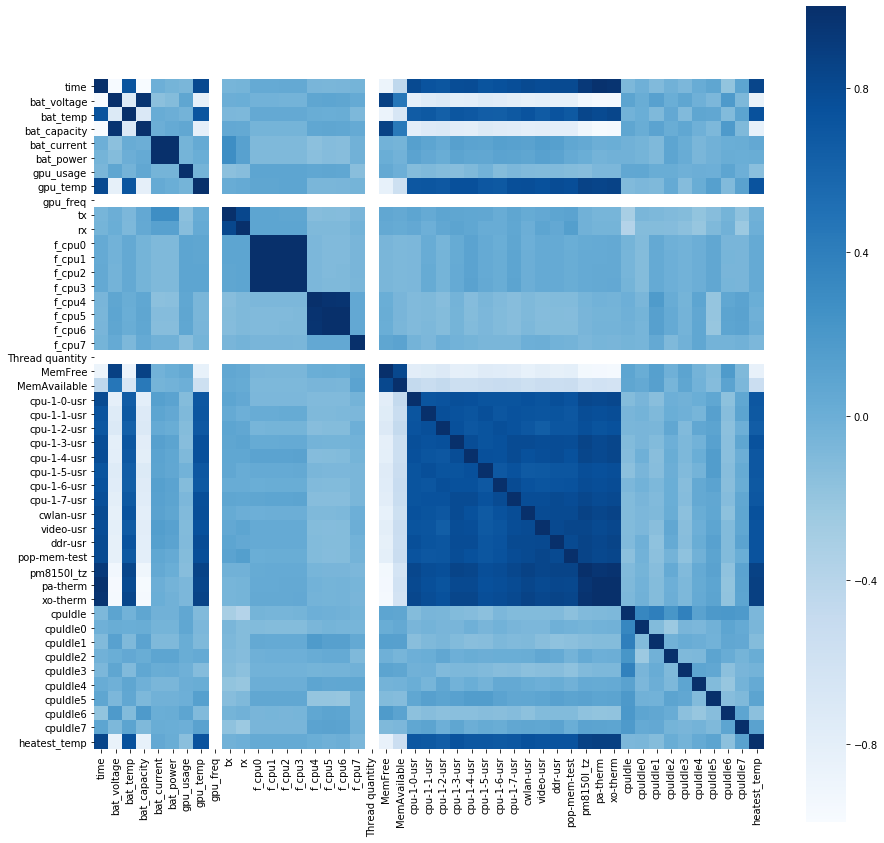

In [68]:
plt.subplots(figsize=(15, 15))
sns.heatmap(DataSet.corr(), vmax=1, square=True, cmap="Blues")
#plt.savefig('./BluesStateRelation.png')
plt.show()

### Description about DataSet
DataSet is the final data pool.

DataSet = LeftSet + RightSet

LeftSet is the statistic data which collected from Data Collector App.

RightSet is the temperature data which abstracted from heat map photos.

**There are already plenty of important features in the pool:**

1. time: format is hhmmss
2. battery: current voltage, current, temperature, capacity
3. GPU: usage, temp, frequency
4. network: tx (upload speed), rx (download speed)
5. CPU Frequency: CPU0 ~ CPU7
6. thread quantity
7. memory: free size, available size
8. CPU Temperature: CPU0 ~ CPU7 (cpu-1-x-usr)
9. WIFI IC Temperature (cwlan-usr)
10. temperature relates to video (video-user, I don't know which hardware generates this temperature)
11. temperature relates to DDR of memory (DDR-usr)
12. temperature relates to memory (pop-mem-test)
13. temperature relates to power manager IC (pm8150l_tz)
14. temperature relates to power amplifier (pa-therm)
15. CPU idle percentage (cpuIdle, cpuidle0 ~ 7)
16. ground truth, surface temperature from smartphone (heatest_temp)

### Above part is data preprocessing

# =======================================================

### Below part is the ML model
#### How to use:
Step1: Grab features you need from DataSet to get the "X" and "y" set. "y" is the groud true set.

Step2: Pick the ML model you like, have fun : )





# Hello World model example




## Training a Linear Regression Model



### X and y arrays

In [69]:
X = DataSet[['time', 'bat_voltage', 'bat_temp', 'bat_capacity', 'bat_current', 'bat_power',
       'gpu_usage', 'gpu_temp', 'gpu_freq', 'tx', 'rx', 'f_cpu0', 'f_cpu1',
       'f_cpu2', 'f_cpu3', 'f_cpu4', 'f_cpu5', 'f_cpu6', 'f_cpu7',
       'Thread quantity', 'MemFree', 'MemAvailable', 'cpu-1-0-usr',
       'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr',
       'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr',
       'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm',
       'cpuIdle', 'cpuIdle0', 'cpuIdle1', 'cpuIdle2', 'cpuIdle3', 'cpuIdle4',
       'cpuIdle5', 'cpuIdle6', 'cpuIdle7']]
y = DataSet['heatest_temp']

### Add delay

In [70]:
#X.drop(X.index[:6], inplace=True)
#y.drop(y.index[len(y)-6:], inplace=True)

### Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Creating and Training the Model

In [73]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evaluation

In [74]:
# print the intercept
print(lm.intercept_)

194.636017241


In [75]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
time,-2.253678e-03
bat_voltage,-1.291918e-02
bat_temp,3.990138e-02
bat_capacity,-1.207701e-01
bat_current,-6.609597e-02
bat_power,1.600404e-02
gpu_usage,-1.241076e-01
gpu_temp,-2.661568e-01
gpu_freq,4.756074e-12
tx,-3.455373e-02


### Predictions from our Model

In [76]:
predictions = lm.predict(X_test)

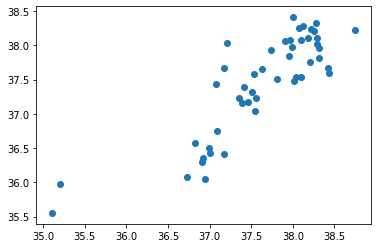

In [77]:
plt.scatter(y_test,predictions)

/Users/xiaoyangzhang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


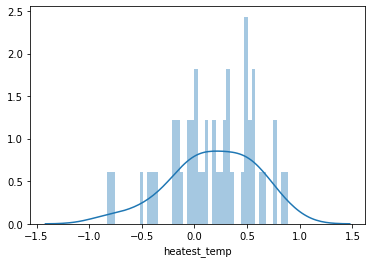

In [78]:
sns.distplot((y_test-predictions),bins=50);

### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [79]:
from sklearn import metrics

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.355629007666
MSE: 0.189880862599
RMSE: 0.435753212954


<Figure size 2160x720 with 0 Axes>

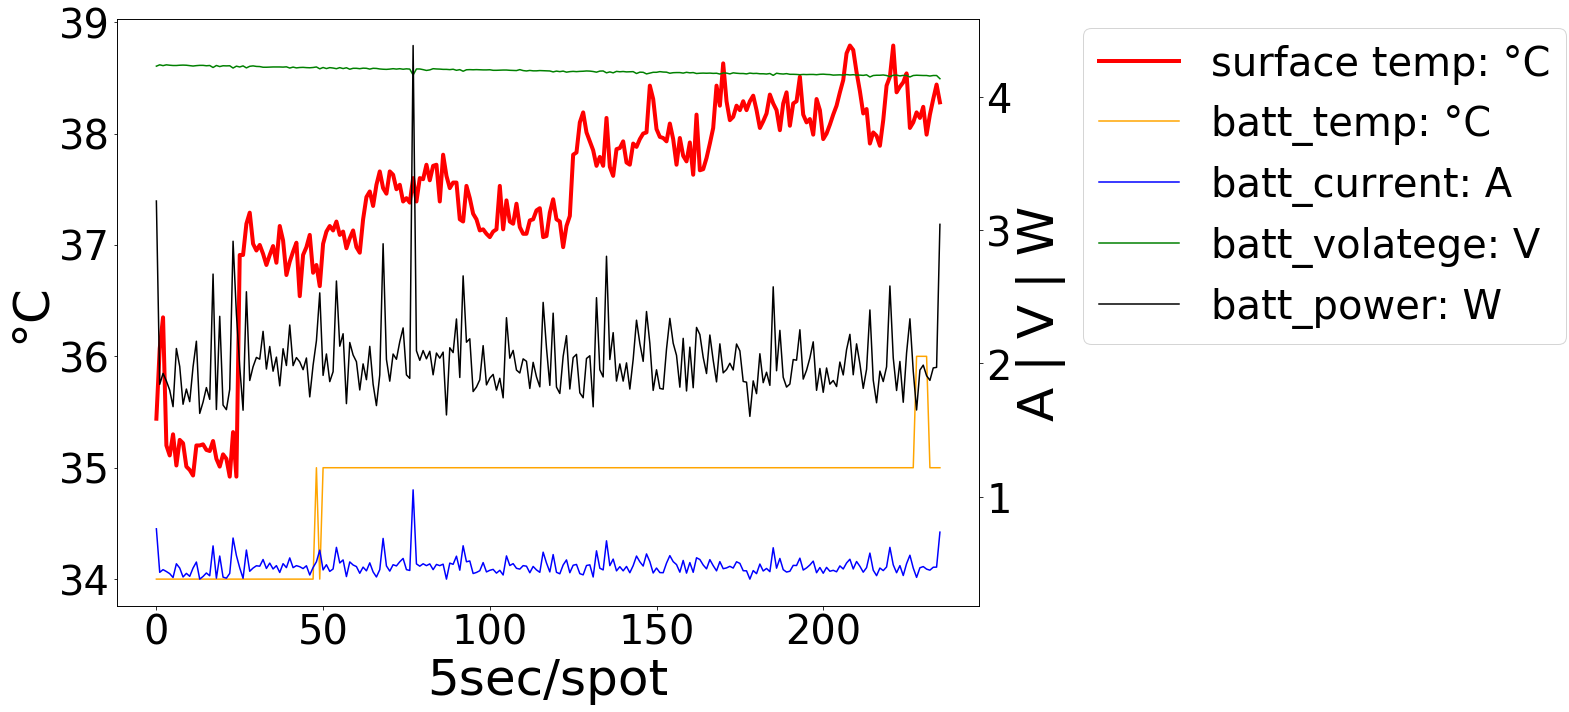

In [112]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('5sec/spot', fontsize=50)
ax1.set_ylabel('°C', fontsize=50)
ax1.plot(y, color='red', label='surface temp: °C', linewidth=4)
ax1.plot(X['bat_temp'], color='orange', label = 'batt_temp: °C')
ax1.tick_params(labelsize=40)
# ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('A | V | W', fontsize=50)
ax2.plot(X['bat_current']/1000, color='blue', label = 'batt_current: A')
ax2.plot(X['bat_voltage']/1000, color='green', label = 'batt_volatege: V')
ax2.plot(X['bat_power']/1000, color='black', label = 'batt_power: W')
# ax2.tick_params(axis='y', labelcolor='blue')

# handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
# fig.legend(handles, labels, loc=10, fontsize=20)
fig.legend(bbox_to_anchor=(1.45,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Surface Temperature VS Battery', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

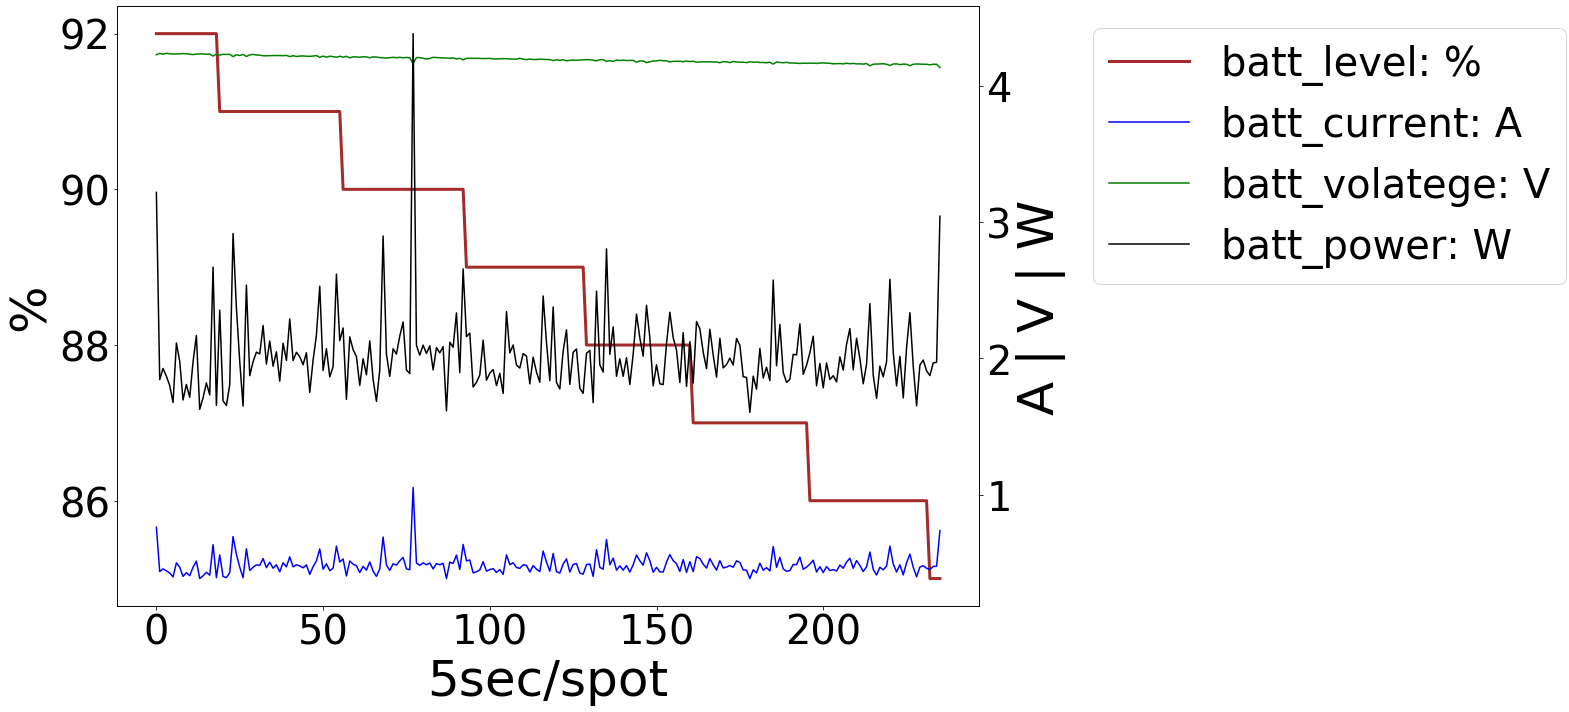

In [113]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('5sec/spot', fontsize=50)
ax1.set_ylabel('%', fontsize=50)

ax1.plot(X['bat_capacity'], color='brown', label = 'batt_level: %', linewidth=3)
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('A | V | W', fontsize=50)
ax2.plot(X['bat_current']/1000, color='blue', label = 'batt_current: A')
ax2.plot(X['bat_voltage']/1000, color='green', label = 'batt_volatege: V')
ax2.plot(X['bat_power']/1000, color='black', label = 'batt_power: W')

fig.legend(bbox_to_anchor=(1.45,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Battery level VS Battery power', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

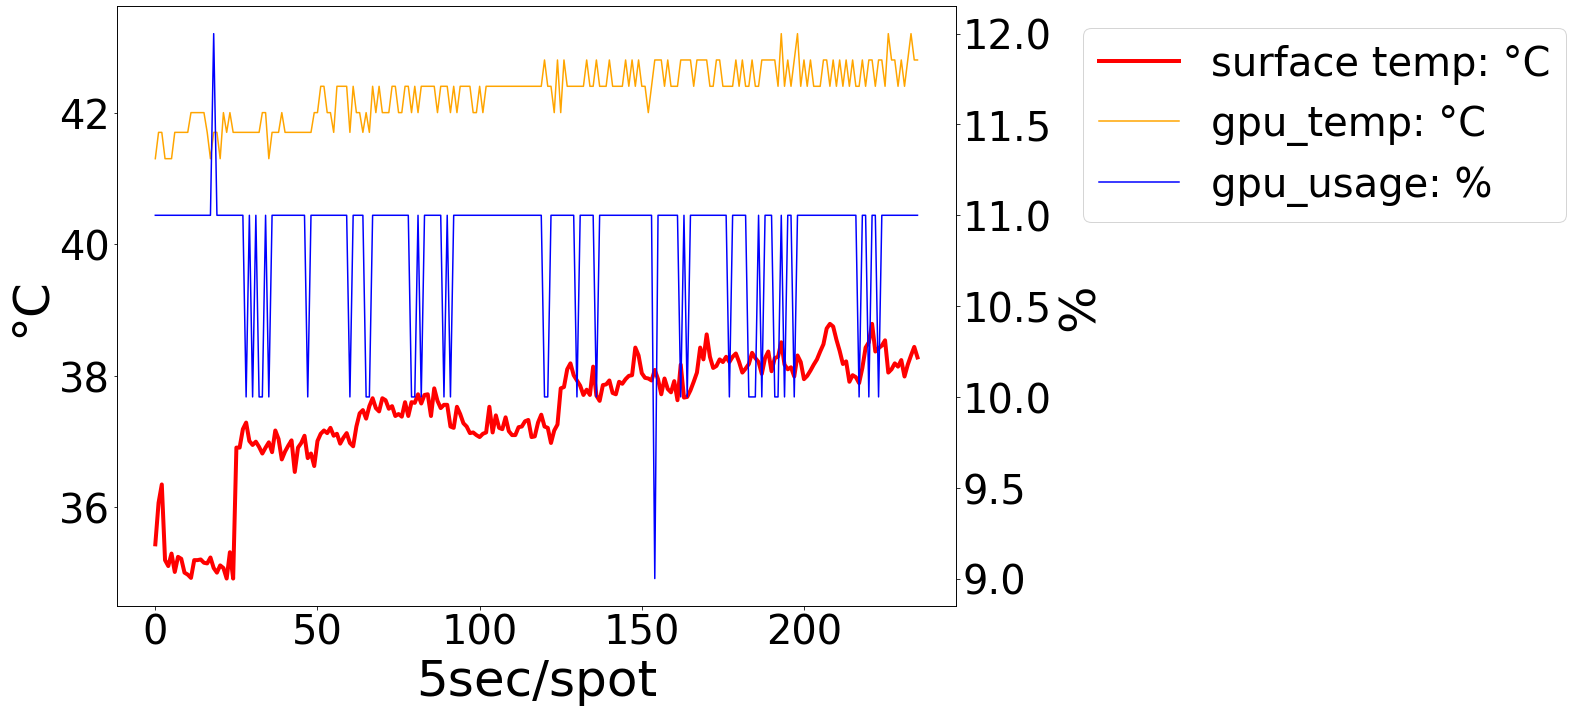

In [114]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('5sec/spot', fontsize=50)
ax1.set_ylabel('°C', fontsize=50)
ax1.plot(y, color='red', label='surface temp: °C', linewidth=4)
ax1.plot(X['gpu_temp'], color='orange', label = 'gpu_temp: °C')
ax1.tick_params(labelsize=40)
# ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('%', fontsize=50)
ax2.plot(X['gpu_usage'], color='blue', label = 'gpu_usage: %')
# ax2.tick_params(axis='y', labelcolor='blue')

# handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
# fig.legend(handles, labels, loc=10, fontsize=20)
fig.legend(bbox_to_anchor=(1.45,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Surface Temperature VS GPU', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

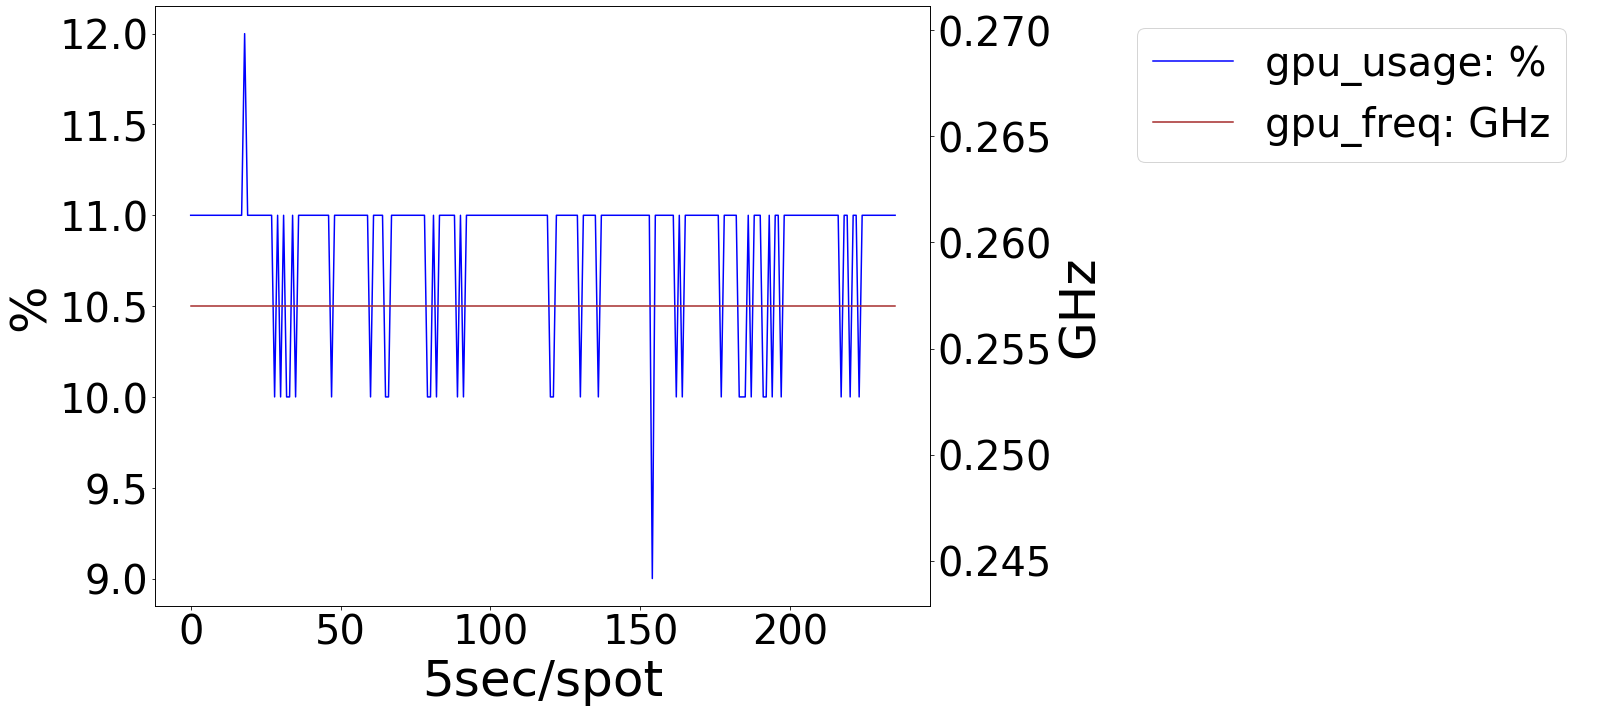

In [115]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('5sec/spot', fontsize=50)
ax1.set_ylabel('%', fontsize=50)
ax1.plot(X['gpu_usage'], color='blue', label = 'gpu_usage: %')
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('GHz', fontsize=50)
ax2.plot(X['gpu_freq']/1000000000, color='brown', label = 'gpu_freq: GHz')

fig.legend(bbox_to_anchor=(1.45,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('GPU usage VS GPU Frequency', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

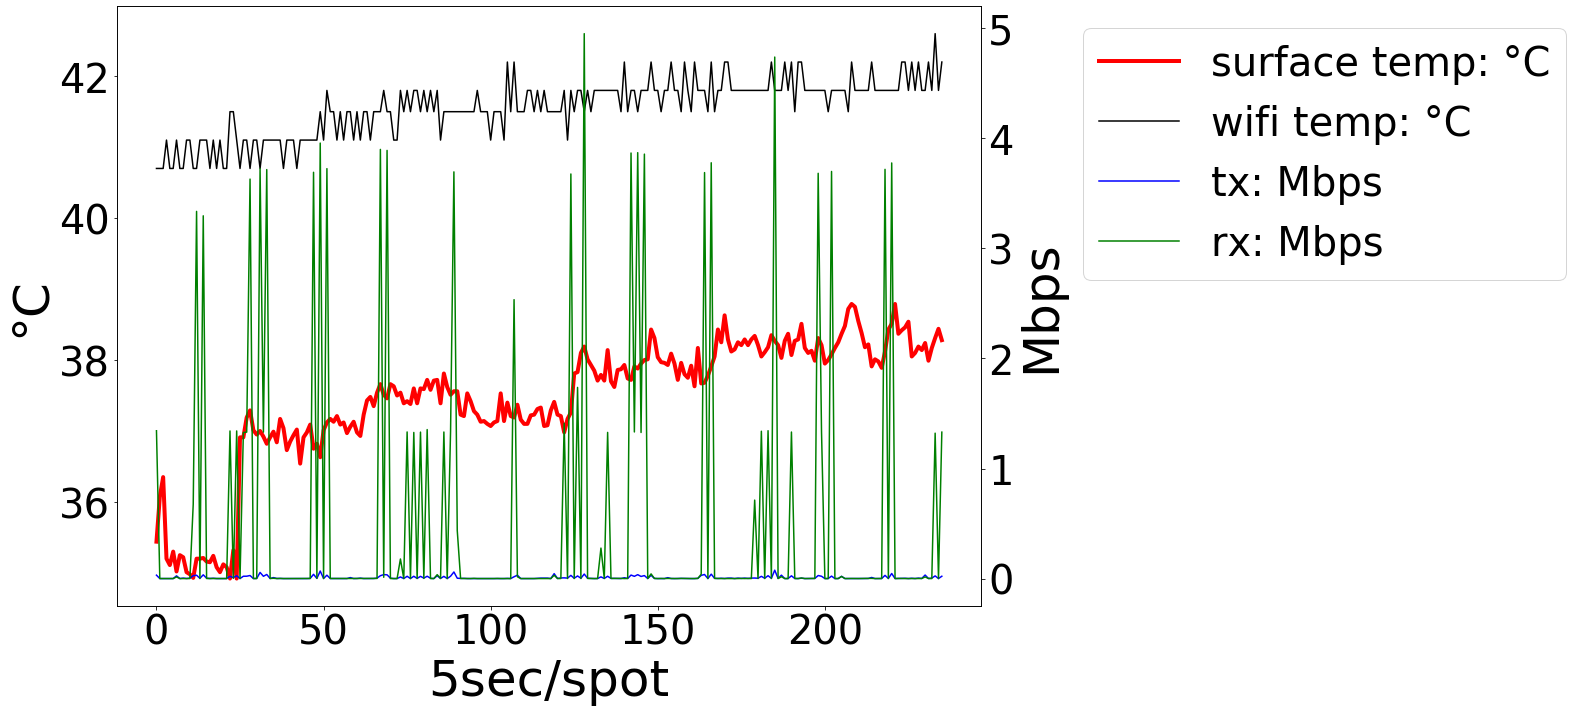

In [116]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('5sec/spot', fontsize=50)
ax1.set_ylabel('°C', fontsize=50)
ax1.plot(y, color='red', label='surface temp: °C', linewidth=4)
ax1.plot(X['cwlan-usr']/1000, color='black', label = 'wifi temp: °C')
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('Mbps', fontsize=50)
ax2.plot(X['tx'] * 8 /1000, color='blue', label = 'tx: Mbps')
ax2.plot(X['rx'] * 8 /1000, color='green', label = 'rx: Mbps')

fig.legend(bbox_to_anchor=(1.45,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Surface Temperature VS Wi-Fi', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

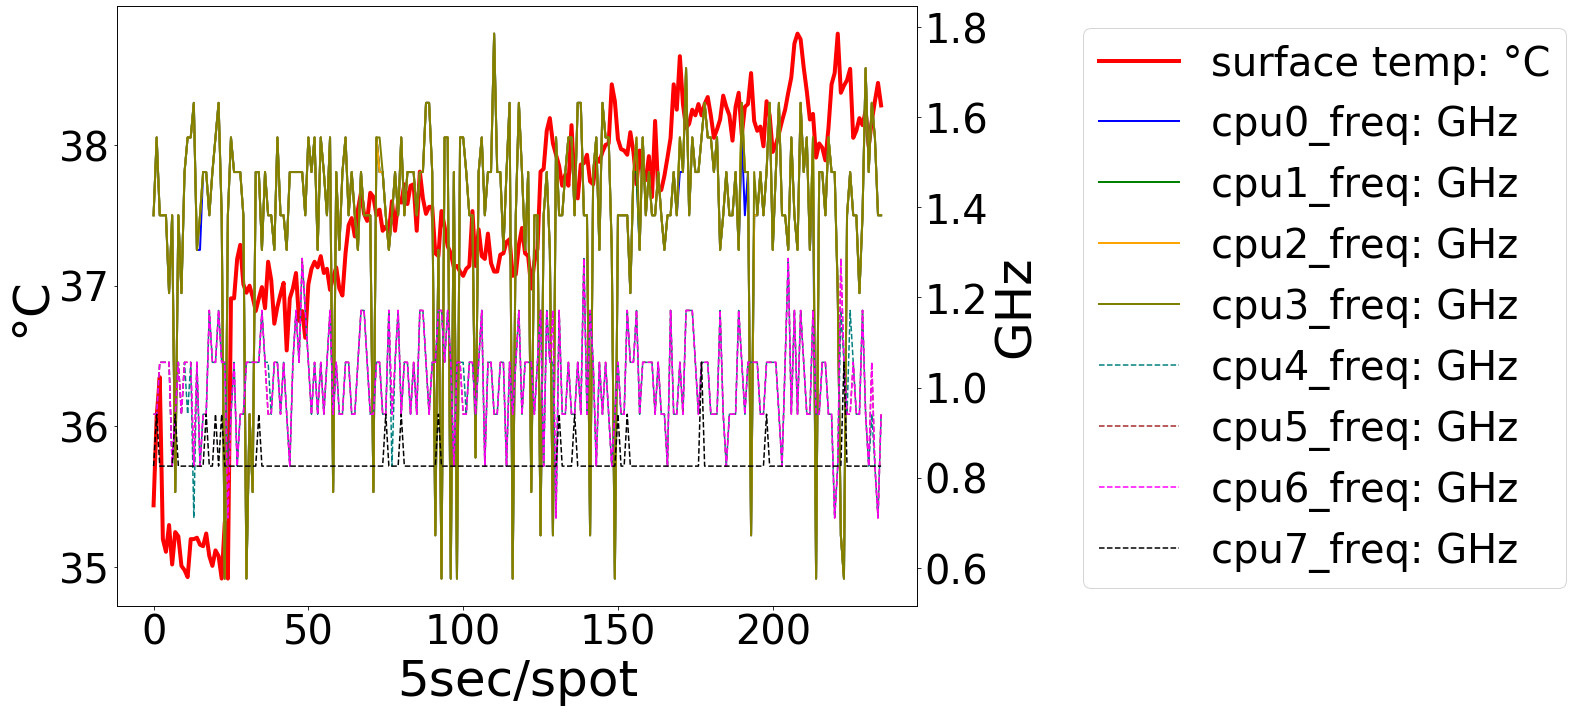

In [117]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('5sec/spot', fontsize=50)
ax1.set_ylabel('°C', fontsize=50)
ax1.plot(y, color='red', label='surface temp: °C', linewidth=4)
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('GHz', fontsize=50)
ax2.plot(X['f_cpu0']/1000000, color='blue', label = 'cpu0_freq: GHz', linewidth=2)
ax2.plot(X['f_cpu1']/1000000, color='green', label = 'cpu1_freq: GHz', linewidth=2)
ax2.plot(X['f_cpu2']/1000000, color='orange', label = 'cpu2_freq: GHz', linewidth=2)
ax2.plot(X['f_cpu3']/1000000, color='olive', label = 'cpu3_freq: GHz', linewidth=2)
ax2.plot(X['f_cpu4']/1000000, color='teal', label = 'cpu4_freq: GHz', linestyle='--')
ax2.plot(X['f_cpu5']/1000000, color='brown', label = 'cpu5_freq: GHz', linestyle='--')
ax2.plot(X['f_cpu6']/1000000, color='fuchsia', label = 'cpu6_freq: GHz', linestyle='--')
ax2.plot(X['f_cpu7']/1000000, color='black', label = 'cpu7_freq: GHz', linestyle='--')

fig.legend(bbox_to_anchor=(1.45,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Surface Temperature VS CPU Frequency', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

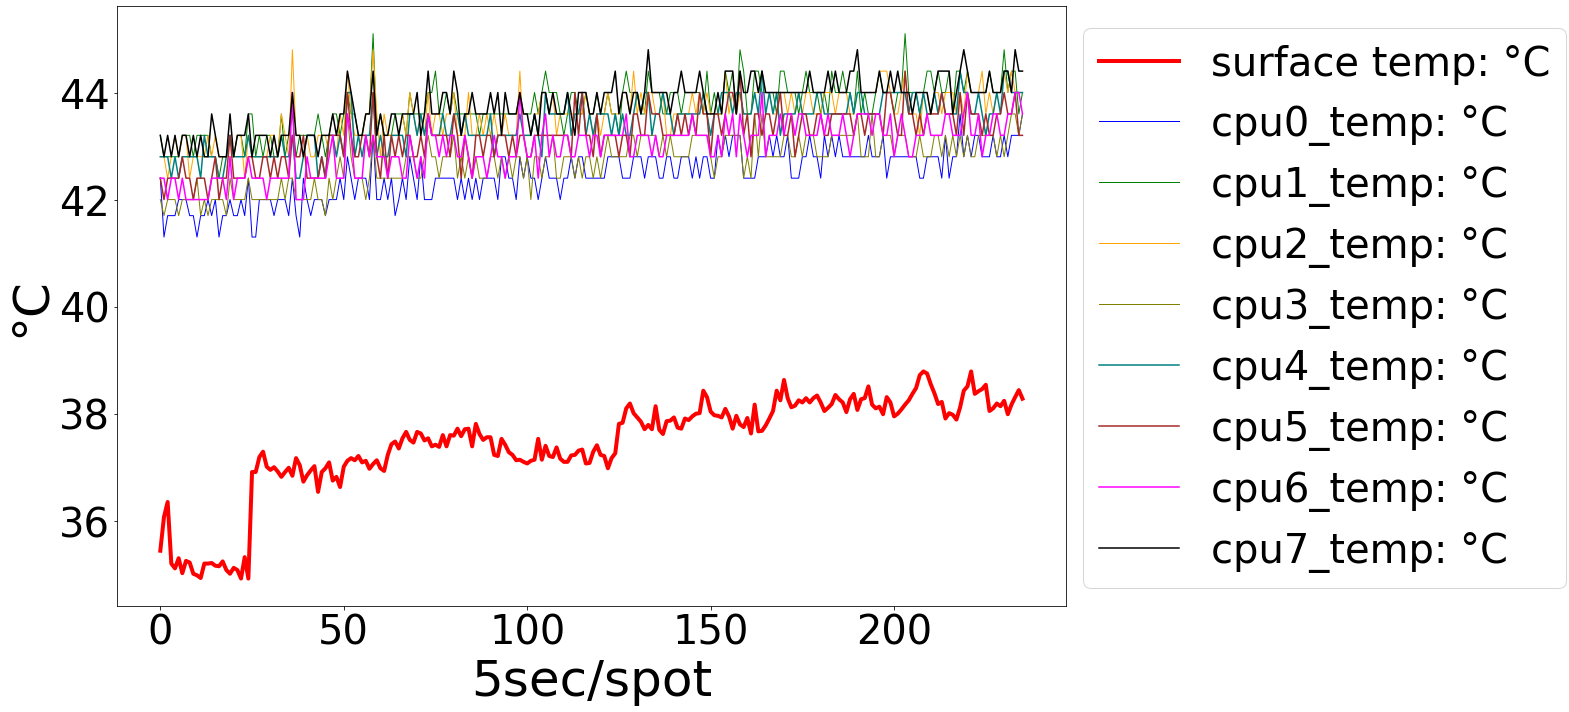

In [118]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('5sec/spot', fontsize=50)
ax1.set_ylabel('°C', fontsize=50)
ax1.plot(y, color='red', label='surface temp: °C', linewidth=4)
ax1.tick_params(labelsize=40)

#ax2 = ax1.twinx()
#ax2.tick_params(labelsize=40)
#ax2.set_ylabel('°C', fontsize=50)
ax1.plot(X['cpu-1-0-usr']/1000, color='blue', label = 'cpu0_temp: °C', linewidth=1)
ax1.plot(X['cpu-1-1-usr']/1000, color='green', label = 'cpu1_temp: °C', linewidth=1)
ax1.plot(X['cpu-1-2-usr']/1000, color='orange', label = 'cpu2_temp: °C', linewidth=1)
ax1.plot(X['cpu-1-3-usr']/1000, color='olive', label = 'cpu3_temp: °C', linewidth=1)
ax1.plot(X['cpu-1-4-usr']/1000, color='teal', label = 'cpu4_temp: °C', linestyle='-')
ax1.plot(X['cpu-1-5-usr']/1000, color='brown', label = 'cpu5_temp: °C', linestyle='-')
ax1.plot(X['cpu-1-6-usr']/1000, color='fuchsia', label = 'cpu6_temp: °C', linestyle='-')
ax1.plot(X['cpu-1-7-usr']/1000, color='black', label = 'cpu7_temp: °C', linestyle='-')

fig.legend(bbox_to_anchor=(1.45,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Surface Temperature VS CPU Temperature', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

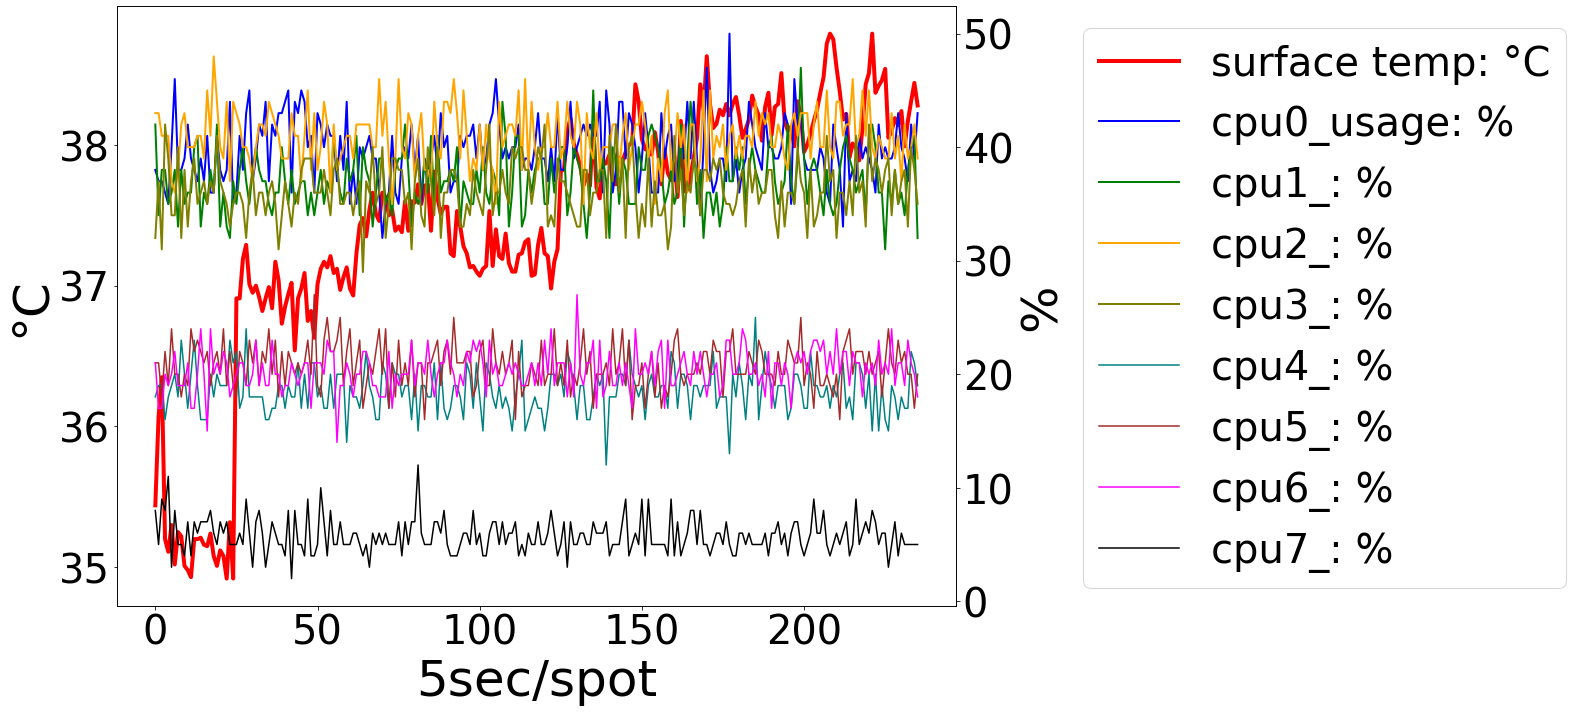

In [120]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('5sec/spot', fontsize=50)
ax1.set_ylabel('°C', fontsize=50)
ax1.plot(y, color='red', label='surface temp: °C', linewidth=4)
ax1.tick_params(labelsize=40)

ax2 = ax1.twinx()
ax2.tick_params(labelsize=40)
ax2.set_ylabel('%', fontsize=50)
ax2.plot(100 - X['cpuIdle0'], color='blue', label = 'cpu0_usage: %', linewidth=2)
ax2.plot(100 - X['cpuIdle1'], color='green', label = 'cpu1_: %', linewidth=2)
ax2.plot(100 - X['cpuIdle2'], color='orange', label = 'cpu2_: %', linewidth=2)
ax2.plot(100 - X['cpuIdle3'], color='olive', label = 'cpu3_: %', linewidth=2)
ax2.plot(100 - X['cpuIdle4'], color='teal', label = 'cpu4_: %', linestyle='-')
ax2.plot(100 - X['cpuIdle5'], color='brown', label = 'cpu5_: %', linestyle='-')
ax2.plot(100 - X['cpuIdle6'], color='fuchsia', label = 'cpu6_: %', linestyle='-')
ax2.plot(100 - X['cpuIdle7'], color='black', label = 'cpu7_: %', linestyle='-')

fig.legend(bbox_to_anchor=(1.45,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Surface Temperature VS CPU Usage', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 2160x720 with 0 Axes>

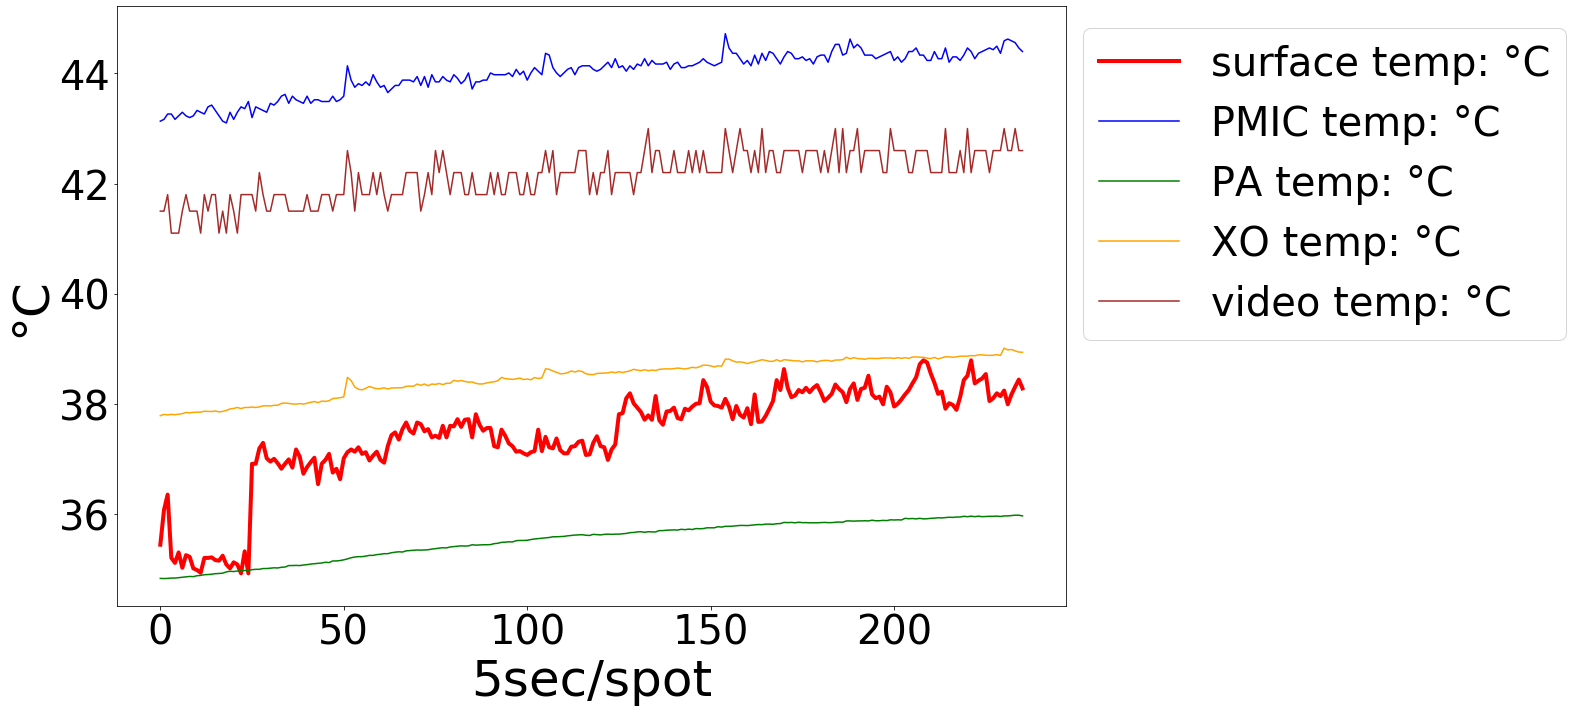

In [122]:
plt.figure(figsize=(30, 10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

ax1.set_xlabel('5sec/spot', fontsize=50)
ax1.set_ylabel('°C', fontsize=50)
ax1.plot(y, color='red', label='surface temp: °C', linewidth=4)
ax1.tick_params(labelsize=40)

ax1.plot(X['pm8150l_tz']/1000, color='blue', label = 'PMIC temp: °C')
ax1.plot(X['pa-therm']/1000, color='green', label = 'PA temp: °C')
ax1.plot(X['xo-therm']/1000, color='orange', label = 'XO temp: °C')
ax1.plot(X['video-usr']/1000, color='brown', label = 'video temp: °C')

fig.legend(bbox_to_anchor=(1.45,0.95), borderaxespad=0, fontsize=40)
# ax1.set_title('Surface Temperature VS Other Temerature', fontsize=40)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
